In [57]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
from numpy import genfromtxt
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import matplotlib
import matplotlib.ticker as mtick

In [59]:
bilinear_416_csv = genfromtxt('/content/drive/My Drive/Colab Notebooks/M202A Final project/data/timing-origin_dataset_bilinear.csv', delimiter=',', dtype=None, encoding=None)
bicubic_416_csv = genfromtxt('/content/drive/My Drive/Colab Notebooks/M202A Final project/data/timing-origin-dataset-default.csv', delimiter=',', dtype=None, encoding=None)
hamming_416_csv = genfromtxt('/content/drive/My Drive/Colab Notebooks/M202A Final project/data/timing-origin_dataset_hamming.csv', delimiter=',', dtype=None, encoding=None)
lanczos_416_csv = genfromtxt('/content/drive/My Drive/Colab Notebooks/M202A Final project/data/timing-origin_dataset_lanczos.csv', delimiter=',', dtype=None, encoding=None)

bilinear_256_csv = genfromtxt('/content/drive/My Drive/Colab Notebooks/M202A Final project/data_256/timing-origin_dataset_bilinear.csv', delimiter=',', dtype=None, encoding=None)
bicubic_256_csv = genfromtxt('/content/drive/My Drive/Colab Notebooks/M202A Final project/data_256/timing-origin_dataset.csv', delimiter=',', dtype=None, encoding=None)
hamming_256_csv = genfromtxt('/content/drive/My Drive/Colab Notebooks/M202A Final project/data_256/timing-origin_dataset_hamming.csv', delimiter=',', dtype=None, encoding=None)
lanczos_256_csv = genfromtxt('/content/drive/My Drive/Colab Notebooks/M202A Final project/data_256/timing-origin_dataset_lanczos.csv', delimiter=',', dtype=None, encoding=None)

bilinear_128_csv = genfromtxt('/content/drive/My Drive/Colab Notebooks/M202A Final project/data_128/timing-origin_dataset_bilinear_128.csv', delimiter=',', dtype=None, encoding=None)
bicubic_128_csv = genfromtxt('/content/drive/My Drive/Colab Notebooks/M202A Final project/data_128/timing-origin_dataset_128.csv', delimiter=',', dtype=None, encoding=None)
hamming_128_csv = genfromtxt('/content/drive/My Drive/Colab Notebooks/M202A Final project/data_128/timing-origin_dataset_hamming_128.csv', delimiter=',', dtype=None, encoding=None)
lanczos_128_csv = genfromtxt('/content/drive/My Drive/Colab Notebooks/M202A Final project/data_128/timing-origin_dataset_lanczos_128.csv', delimiter=',', dtype=None, encoding=None)

combined_data = np.concatenate( (bilinear_416_csv, bicubic_416_csv, hamming_416_csv, lanczos_416_csv,
bilinear_256_csv, bicubic_256_csv, hamming_256_csv, lanczos_256_csv,
bilinear_128_csv, bicubic_128_csv, hamming_128_csv, lanczos_128_csv ))

images_without_cups = ["1638858312.2182076.jpg",
"1638858980.1257513.jpg",
"1638859029.3403072.jpg",
"1638859059.827174.jpg",
"1638859082.9124146.jpg",
"1638859150.8668318.jpg",
"1638859154.4812253.jpg",
"1638859400.6757352.jpg",
"1638859456.9389522.jpg",
"1638859502.4543705.jpg",
"1638859540.9344175.jpg",
"1638859573.0005805.jpg",
"1638859580.7838762.jpg",
"1638858280.0541258.jpg"]

In [60]:
def average_data(csv):
    averaged = {} # key is image, value is array of data but averaged

    for i in range(0, len(csv), 5): # row of table
        avrg_array = [0]*6
        for j in range(1, 7): # column of table
            avrg_array[j-1] = np.mean([csv[k][j] for k in range(i, i+5)])
        averaged[csv[i][0]] = avrg_array

    return averaged

def accuracy_series(avrged_data):
    return [(value[4] if value[4] != 0 else 1) for value in avrged_data.values()]



[0.45775836999999997, 0.66685265, 0.27348718, 0.37291086, 0.22751069, 0.2939817, 0.0, 0.0, 0.0, 0.0, 0.13610418, 0.28671592, 0.20377833, 0.0, 0.0, 0.28755185, 0.12787828, 0.0, 0.0, 0.26751778, 0.28848574, 0.10836424, 0.16401142, 0.1126547, 0.2874915, 0.0, 0.3821206, 0.0, 0.34525362, 0.24462661, 0.41658112, 0.37306544, 0.68191713, 0.0, 0.49357352, 0.32586858, 0.21142085000000002, 0.20524208000000002, 0.3477578, 0.54244334, 0.0, 0.23299535, 0.0, 0.0, 0.7622734, 0.39338475, 0.67751884, 0.37819996, 0.0, 0.6663108, 0.23443293999999998, 0.11344191, 0.0, 0.0, 0.5084243, 0.24990600000000002, 0.0, 0.19036771, 0.38596797, 0.0, 0.22284093, 0.45566407, 0.0, 0.23959373, 0.0, 0.64673114, 0.0, 0.17083679, 0.0, 0.14286776, 0.42699999999999994, 0.0, 0.33344126, 0.2741389, 0.44821711999999997, 0.4386972800000001, 0.65475476, 0.250705, 0.30634862, 0.5854291, 0.0, 0.0, 0.4849463, 0.50011307, 0.72356814, 0.0, 0.6572477, 0.27513605, 0.74956524, 0.31299362, 0.3867327, 0.20873009000000003, 0.0, 0.0, 0.3165501

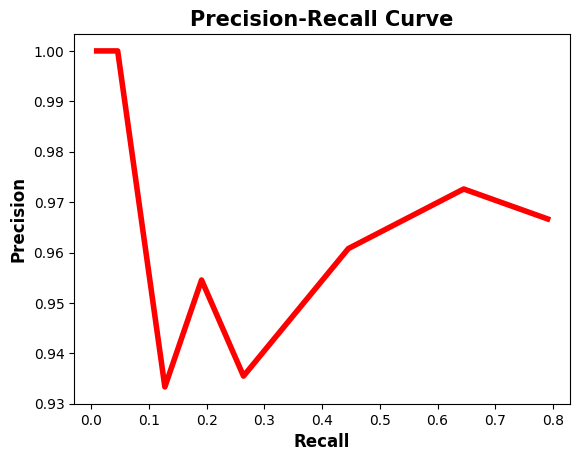

0.7604118396791744
0.947133192019934


In [61]:
def precision_recall_curve(y_true, pred_scores, thresholds):
    precisions = []
    recalls = []
    
    for threshold in thresholds:
        y_pred = ["positive" if score >= threshold else "negative" for score in pred_scores]

        precision = sklearn.metrics.precision_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
        recall = sklearn.metrics.recall_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
        
        precisions.append(precision)
        recalls.append(recall)

    return precisions, recalls

bilinear_416_avg = average_data(bilinear_416_csv)
y_true = [("negative" if key in images_without_cups else "positive") for key in bilinear_416_avg.keys()]
pred_scores = [value[4] for value in bilinear_416_avg.values()]
thresholds = np.arange(start=0.1, stop=0.9, step=0.1)
print(pred_scores)
precisions, recalls = precision_recall_curve(y_true=y_true, 
                                             pred_scores=pred_scores, 
                                             thresholds=thresholds)

matplotlib.pyplot.plot(recalls, precisions, linewidth=4, color="red", zorder=0)

matplotlib.pyplot.xlabel("Recall", fontsize=12, fontweight='bold')
matplotlib.pyplot.ylabel("Precision", fontsize=12, fontweight='bold')
matplotlib.pyplot.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
matplotlib.pyplot.show()

precisions.append(1)
recalls.append(0)

precisions = np.array(precisions)
recalls = np.array(recalls)

AP = np.sum((recalls[:-1] - recalls[1:]) * precisions[:-1])
print(AP)

#y_true = [(0 if x is "negative" else 1) for x in y_true]
ap_ = sklearn.metrics.average_precision_score(y_true, pred_scores,pos_label="positive")
print(ap_)

0.9432073118497432
0.9409222546175781
0.947133192019934
0.939818990045383
0.9311658170292385
0.9401618858204088
0.9423056897050646
0.931757574478706
0.9090231633965971
0.9315157862266341
0.9366653409280747
0.9136110567104971


Text(0.5, 23.52222222222222, 'Average Precision')

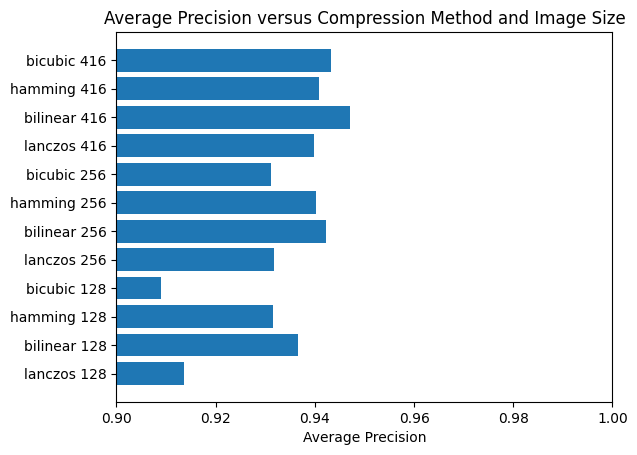

In [66]:
cases = (
    "bicubic 416", 
    "hamming 416", 
    "bilinear 416",
    "lanczos 416", 
    "bicubic 256", 
    "hamming 256",
    "bilinear 256", 
    "lanczos 256",
    "bicubic 128",
    "hamming 128",
    "bilinear 128",
    "lanczos 128"
)
# 416
bicubic_416_avg = average_data(bicubic_416_csv)
y_true = [(0 if key in images_without_cups else 1) for key in bicubic_416_avg.keys()]
pred_scores = [value[4] for value in bicubic_416_avg.values()]
ap_bicubic_416 = sklearn.metrics.average_precision_score(y_true, pred_scores,pos_label=1)
print(ap_bicubic_416)

hamming_416_avg = average_data(hamming_416_csv)
y_true = [(0 if key in images_without_cups else 1) for key in hamming_416_avg.keys()]
pred_scores = [value[4] for value in hamming_416_avg.values()]
ap_hamming_416 = sklearn.metrics.average_precision_score(y_true, pred_scores,pos_label=1)
print(ap_hamming_416)

bilinear_416_avg = average_data(bilinear_416_csv)
y_true = [(0 if key in images_without_cups else 1) for key in bilinear_416_avg.keys()]
pred_scores = [value[4] for value in bilinear_416_avg.values()]
ap_bilinear_416 = sklearn.metrics.average_precision_score(y_true, pred_scores,pos_label=1)
print(ap_bilinear_416)

lanczos_416_avg = average_data(lanczos_416_csv)
y_true = [(0 if key in images_without_cups else 1) for key in lanczos_416_avg.keys()]
pred_scores = [value[4] for value in lanczos_416_avg.values()]
ap_lanczos_416 = sklearn.metrics.average_precision_score(y_true, pred_scores,pos_label=1)
print(ap_lanczos_416)

#256
bicubic_256_avg = average_data(bicubic_256_csv)
y_true = [(0 if key in images_without_cups else 1) for key in bicubic_256_avg.keys()]
pred_scores = [value[4] for value in bicubic_256_avg.values()]
ap_bicubic_256 = sklearn.metrics.average_precision_score(y_true, pred_scores,pos_label=1)
print(ap_bicubic_256)

hamming_256_avg = average_data(hamming_256_csv)
y_true = [(0 if key in images_without_cups else 1) for key in hamming_256_avg.keys()]
pred_scores = [value[4] for value in hamming_256_avg.values()]
ap_hamming_256 = sklearn.metrics.average_precision_score(y_true, pred_scores,pos_label=1)
print(ap_hamming_256)

bilinear_256_avg = average_data(bilinear_256_csv)
y_true = [(0 if key in images_without_cups else 1) for key in bilinear_256_avg.keys()]
pred_scores = [value[4] for value in bilinear_256_avg.values()]
ap_bilinear_256 = sklearn.metrics.average_precision_score(y_true, pred_scores,pos_label=1)
print(ap_bilinear_256)

lanczos_256_avg = average_data(lanczos_256_csv)
y_true = [(0 if key in images_without_cups else 1) for key in lanczos_256_avg.keys()]
pred_scores = [value[4] for value in lanczos_256_avg.values()]
ap_lanczos_256 = sklearn.metrics.average_precision_score(y_true, pred_scores,pos_label=1)
print(ap_lanczos_256)

#128
bicubic_128_avg = average_data(bicubic_128_csv)
y_true = [(0 if key in images_without_cups else 1) for key in bicubic_128_avg.keys()]
pred_scores = [value[4] for value in bicubic_128_avg.values()]
ap_bicubic_128 = sklearn.metrics.average_precision_score(y_true, pred_scores,pos_label=1)
print(ap_bicubic_128)

hamming_128_avg = average_data(hamming_128_csv)
y_true = [(0 if key in images_without_cups else 1) for key in hamming_128_avg.keys()]
pred_scores = [value[4] for value in hamming_128_avg.values()]
ap_hamming_128 = sklearn.metrics.average_precision_score(y_true, pred_scores,pos_label=1)
print(ap_hamming_128)

bilinear_128_avg = average_data(bilinear_128_csv)
y_true = [(0 if key in images_without_cups else 1) for key in bilinear_128_avg.keys()]
pred_scores = [value[4] for value in bilinear_128_avg.values()]
ap_bilinear_128 = sklearn.metrics.average_precision_score(y_true, pred_scores,pos_label=1)
print(ap_bilinear_128)

lanczos_128_avg = average_data(lanczos_128_csv)
y_true = [(0 if key in images_without_cups else 1) for key in lanczos_128_avg.keys()]
pred_scores = [value[4] for value in lanczos_128_avg.values()]
ap_lanczos_128 = sklearn.metrics.average_precision_score(y_true, pred_scores,pos_label=1)
print(ap_lanczos_128)

ap_arr = [
    ap_bicubic_416,
    ap_hamming_416,
    ap_bilinear_416,
    ap_lanczos_416,
    ap_bicubic_256,
    ap_hamming_256,
    ap_bilinear_256,
    ap_lanczos_256,
    ap_bicubic_128,
    ap_hamming_128,
    ap_bilinear_128,
    ap_lanczos_128,
]

fig, ax = plt.subplots()
plt.rcdefaults()
y_pos = np.arange(len(cases))
ax.barh(y_pos, ap_arr, align='center')
ax.set_xlim(0.9, 1)
ax.set_yticks(y_pos)
ax.set_yticklabels(cases)
ax.invert_yaxis()

plt.title("Average Precision versus Compression Method and Image Size")
plt.xlabel("Average Precision")